In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Initiliaze coordinates list.
coordinates = list (lat_lngs)

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the requests library.
import requests

In [6]:
# Import the API Key
from config import weather_api_key

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ae4a60de00c20326504a703c45ccd970


In [8]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into the city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | satitoa
City not found. Skipping...
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | maneadero
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | chernyshevskiy
Processing Record 10 of Set 1 | myaundzha
Processing Record 11 of Set 1 | luoyang
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | hambantota
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | ruteng
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | mudgee
Processing Record 21 of Set 1 | sao joao da 

Processing Record 38 of Set 4 | merced
Processing Record 39 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 40 of Set 4 | dwarka
Processing Record 41 of Set 4 | pawa
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | tshela
Processing Record 44 of Set 4 | sampit
Processing Record 45 of Set 4 | cape town
Processing Record 46 of Set 4 | barranca
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | kingaroy
Processing Record 49 of Set 4 | guasdualito
Processing Record 50 of Set 4 | bambari
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | obluche
City not found. Skipping...
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | waiuku
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | vengerovo
Processing Record 9 of Set 5 | chavakachcheri
Processing Record 10 of Set 5 | east london
Processing 

Processing Record 26 of Set 8 | ketchikan
Processing Record 27 of Set 8 | tuktoyaktuk
Processing Record 28 of Set 8 | oranjemund
Processing Record 29 of Set 8 | enumclaw
Processing Record 30 of Set 8 | berbera
Processing Record 31 of Set 8 | bubaque
Processing Record 32 of Set 8 | luanda
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | santa eulalia del rio
City not found. Skipping...
Processing Record 35 of Set 8 | cervo
Processing Record 36 of Set 8 | meadow lake
Processing Record 37 of Set 8 | zhanaozen
Processing Record 38 of Set 8 | mbandaka
Processing Record 39 of Set 8 | leningradskiy
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | wilkie
Processing Record 42 of Set 8 | bellavista
Processing Record 43 of Set 8 | antsohihy
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | punta alta
Processing Record 46 of Set 8 | socorro
Processing Record 47 of Set 8 | mildura
Processing Record 48 of Set 8 | nishihara
Process

Processing Record 13 of Set 12 | bria
Processing Record 14 of Set 12 | lamu
Processing Record 15 of Set 12 | vysokogornyy
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | aguimes
Processing Record 18 of Set 12 | andenes
Processing Record 19 of Set 12 | kemerovo
Processing Record 20 of Set 12 | tsiroanomandidy
Processing Record 21 of Set 12 | beyla
Processing Record 22 of Set 12 | pudozh
Processing Record 23 of Set 12 | bundaberg
Processing Record 24 of Set 12 | mumbwa
Processing Record 25 of Set 12 | marzuq
Processing Record 26 of Set 12 | vero beach
Processing Record 27 of Set 12 | olafsvik
Processing Record 28 of Set 12 | makakilo city
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | agadir
Processing Record 31 of Set 12 | bargal
City not found. Skipping...
Processing Record 32 of Set 12 | nieuw amsterdam
Processing Record 33 of Set 12 | sola
Processing Record 34 of Set 12 | griffith
Processing Record 35 of Set 12 | pavlovsk
Processing

In [10]:
len(city_data)

571

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avera,33.1940,-82.5271,65.71,60,5,4.94,US,2022-05-10 00:31:48
1,Vaini,-21.2000,-175.2000,77.16,61,40,6.91,TO,2022-05-10 00:23:06
2,Coquimbo,-29.9533,-71.3436,58.73,82,0,2.30,CL,2022-05-10 00:31:50
3,Kapaa,22.0752,-159.3190,82.72,73,20,13.80,US,2022-05-10 00:28:10
4,Maneadero,31.7167,-116.5667,64.09,73,55,5.99,MX,2022-05-10 00:31:50
5,Albany,42.6001,-73.9662,66.61,53,1,4.12,US,2022-05-10 00:29:44
6,Chernyshevskiy,63.0128,112.4714,27.88,64,50,6.04,RU,2022-05-10 00:31:51
7,Myaundzha,63.0494,147.1858,31.15,95,61,2.98,RU,2022-05-10 00:31:52
8,Luoyang,34.6836,112.4536,60.55,61,0,4.76,CN,2022-05-10 00:31:52
9,Port Elizabeth,-33.9180,25.5701,55.31,98,0,3.44,ZA,2022-05-10 00:24:18


In [12]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avera,US,2022-05-10 00:31:48,33.1940,-82.5271,65.71,60,5,4.94
1,Vaini,TO,2022-05-10 00:23:06,-21.2000,-175.2000,77.16,61,40,6.91
2,Coquimbo,CL,2022-05-10 00:31:50,-29.9533,-71.3436,58.73,82,0,2.30
3,Kapaa,US,2022-05-10 00:28:10,22.0752,-159.3190,82.72,73,20,13.80
4,Maneadero,MX,2022-05-10 00:31:50,31.7167,-116.5667,64.09,73,55,5.99
...,...,...,...,...,...,...,...,...,...
566,Vao,NC,2022-05-10 00:46:57,-22.6667,167.4833,74.41,70,75,17.45
567,Along,IN,2022-05-10 00:49:09,28.1667,94.7667,74.26,85,27,0.49
568,Fairbanks,US,2022-05-10 00:47:50,64.8378,-147.7164,37.74,90,100,5.75
569,Bam,IR,2022-05-10 00:49:09,29.1060,58.3570,73.72,19,0,7.76


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Read the csv into a DataFrame to be used for plotting.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Avera,US,2022-05-10 00:31:48,33.1940,-82.5271,65.71,60,5,4.94
1,1,Vaini,TO,2022-05-10 00:23:06,-21.2000,-175.2000,77.16,61,40,6.91
2,2,Coquimbo,CL,2022-05-10 00:31:50,-29.9533,-71.3436,58.73,82,0,2.30
3,3,Kapaa,US,2022-05-10 00:28:10,22.0752,-159.3190,82.72,73,20,13.80
4,4,Maneadero,MX,2022-05-10 00:31:50,31.7167,-116.5667,64.09,73,55,5.99
...,...,...,...,...,...,...,...,...,...,...
566,566,Vao,NC,2022-05-10 00:46:57,-22.6667,167.4833,74.41,70,75,17.45
567,567,Along,IN,2022-05-10 00:49:09,28.1667,94.7667,74.26,85,27,0.49
568,568,Fairbanks,US,2022-05-10 00:47:50,64.8378,-147.7164,37.74,90,100,5.75
569,569,Bam,IR,2022-05-10 00:49:09,29.1060,58.3570,73.72,19,0,7.76


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

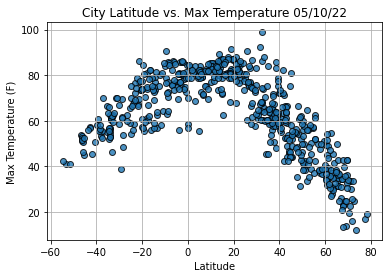

In [11]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperture.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

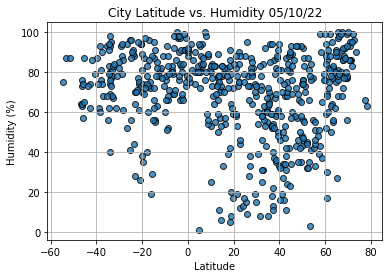

In [12]:
# Build the scatter plots for latitude vs humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

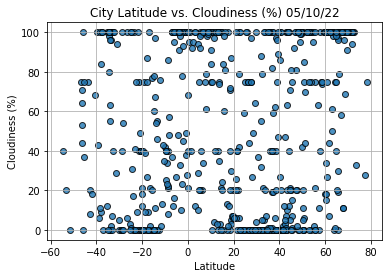

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

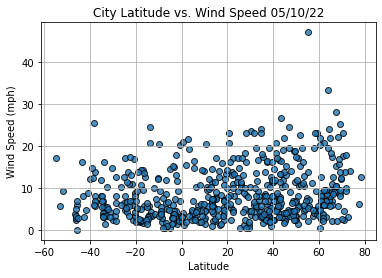

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [1]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data.
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create the scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotat the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Get a row from the city data DataFrame.
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Atuona
Country                        PF
Date          2022-05-10 00:24:30
Lat                          -9.8
Lng                     -139.0333
Max Temp                    78.64
Humidity                       76
Cloudiness                     25
Wind Speed                  20.54
Name: 13, dtype: object

In [16]:
# Filter the data frame to get Northern Hemisphere latitudes (>= 0)
city_data_df["Lat"]>=0

0       True
1      False
2      False
3       True
4       True
       ...  
566    False
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [17]:
# Use loc to get all of the cities with latitudes greater than or equal to 0.
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Avera,US,2022-05-10 00:31:48,33.1940,-82.5271,65.71,60,5,4.94
3,3,Kapaa,US,2022-05-10 00:28:10,22.0752,-159.3190,82.72,73,20,13.80
4,4,Maneadero,MX,2022-05-10 00:31:50,31.7167,-116.5667,64.09,73,55,5.99
5,5,Albany,US,2022-05-10 00:29:44,42.6001,-73.9662,66.61,53,1,4.12
6,6,Chernyshevskiy,RU,2022-05-10 00:31:51,63.0128,112.4714,27.88,64,50,6.04


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

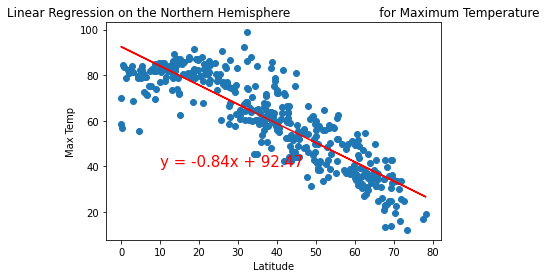

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp',(10,40))

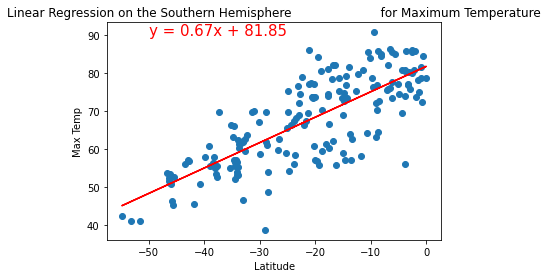

In [21]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

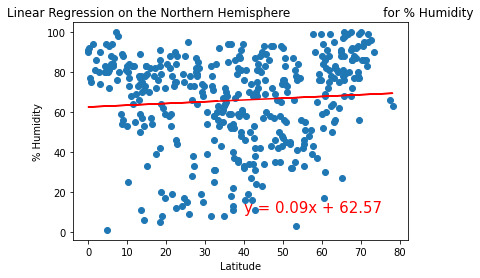

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(40,10))

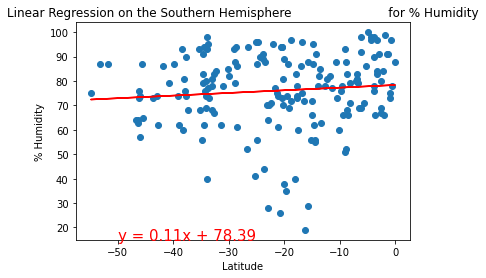

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

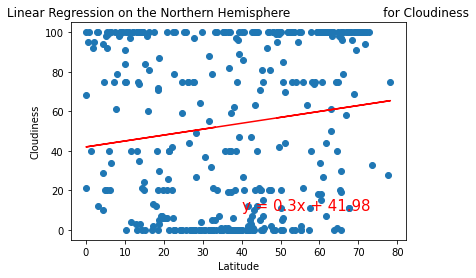

In [32]:
# Linear regression for cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Cloudiness', 'Cloudiness',(40,10))

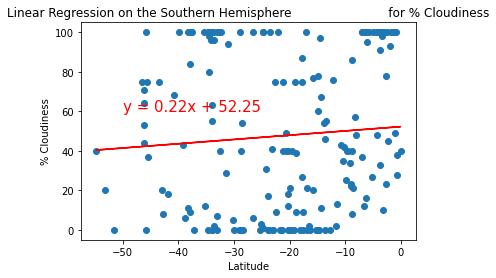

In [33]:
# Linear regression for cloudiness on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

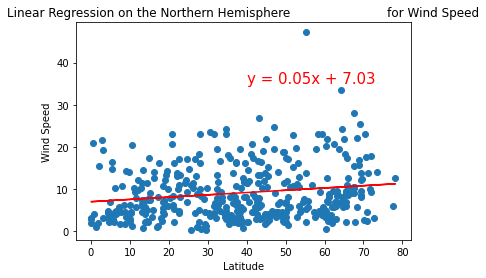

In [34]:
# Linear regression for wind speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

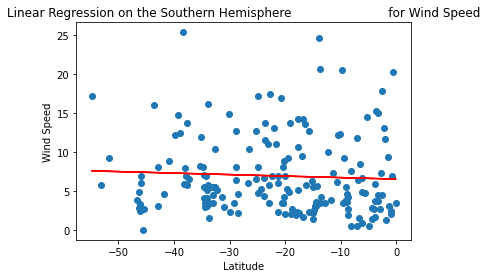

In [44]:
# Linear regression for wind speed on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))